In [26]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

import seaborn
%matplotlib inline

from tqdm import tqdm

In [27]:
class EGreedyMAB:
    
    def __init__(self, epsilon=.1):
        self.arm_feedback = {}
        self.arm_plays = {}
        self.arm_mean_payoff = {}
        self.epsilon = epsilon
        
        
    def get_decision(self,arm_id_list, arm_feature_list):
        np.random.shuffle(arm_id_list)
        current_averages = {id: self.arm_mean_payoff.get(id,100) for id in arm_id_list}
        
        if np.random.rand() < self.epsilon:
            return np.random.choice(arm_id_list)
        else:
            return max(current_averages, key=current_averages.get)
    
    def update(self, arm_id, reward):
        self.arm_feedback[arm_id] = self.arm_feedback.get(arm_id,0) + reward
        self.arm_plays[arm_id] = self.arm_plays.get(arm_id,0) + 1.0
        self.arm_mean_payoff[arm_id] = self.arm_feedback[arm_id] / self.arm_plays[arm_id]

In [28]:
from numpy import *
from scipy.stats import beta

class BetaBandit(object):
    def __init__(self, num_options=2 , prior =(1,1)):
        self.trials = zeros(shape =(num_options,), dtype=int)
        self.successes = zeros(shape=(num_options,), dtype = int)
        self.num_options = num_options
        self.prior = prior
    
    def add_result(self, trial_id, sucess):
        self.trials[trial_id]=self.trials[trial.id]+1
        if (success):
            self.successes[trial_id]=self.successes[trial_id]+1
     
    def get_recommendation(self):
        sampled_theta = []
        for i in range(self.num_options):
            dist = beta(self.prior[0]+self.successes[i],
                       self.prior[1]+self.trials[i]-self.successes[i])
            sampled_theta += [dist.rvs()]
        return sampled_theta.index(max(sampled_theta))   
        

In [29]:
import numpy as np

class SimpleSimulator:
    
    def __init__(self,n_arms,loc_value, scale_value):
        self.arm_probs = {}
        for i in range(0, n_arms):
            self.arm_probs[i] = np.random.normal(loc=loc_value, scale = scale_value, size = None)
    
    def get_available_arms(self):
        return self.arm_probs.keys(), []
    
    def get_reward(self, arm_id):
        return scipy.stats.bernoulli.rvs(self.arm_probs.get(arm_id,0)   )
    

In [30]:
s1 = SimpleSimulator(10,4,2)
s2 = SimpleSimulator(5,3, 4)

In [31]:
s1.arm_probs

{0: 0.8969123251297213,
 1: 3.187761754139817,
 2: 5.590476073393909,
 3: 4.923619209561719,
 4: 5.046525444504034,
 5: 3.9793065957176745,
 6: 5.3064542988774965,
 7: 2.724810764618386,
 8: 6.102445580232123,
 9: -0.06578528950000351}

In [32]:
s2.arm_probs

{0: -3.4481049942629474,
 1: 6.956927325620036,
 2: -0.7776807081609372,
 3: 11.76512152381367,
 4: 2.138708620064106}

In [33]:
TIME_STEPS = 50000
N_ARMS = 500
# Arms, Mean, Standard Deviation
sim = SimpleSimulator(N_ARMS, .5, .1)

mab = EGreedyMAB()
reward_list = []
played = [0 for i in range(N_ARMS)]

for t in tqdm(np.arange(TIME_STEPS)):
    arms, arm_features = sim.get_available_arms()
    arm_to_play = mab.get_decision(arms, arm_features)
    
    played[arm_to_play] += 1
     
    reward = sim.get_reward(arm_to_play)
    mab.update(arm_to_play, reward)
    
    reward_list.append(reward)

    

print 'total_reward', np.sum(reward_list)
print 'average_reward', np.mean(reward_list)


max_payoff = max(sim.arm_probs.values())
print 'best possible', max_payoff 


100%|██████████| 50000/50000 [00:11<00:00, 4403.46it/s]

total_reward 36387
average_reward 0.72774
best possible 0.83378198802


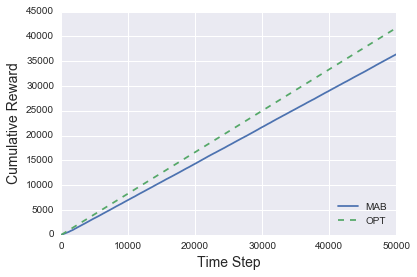

In [34]:
max_payoff = max(sim.arm_probs.values())

plt.plot(np.arange(len(reward_list)), np.cumsum(reward_list), label='MAB')

plt.plot(np.arange(TIME_STEPS), np.cumsum([max_payoff]*TIME_STEPS), label='OPT', ls='--')

plt.legend(loc='lower right')

plt.xlabel("Time Step", fontsize=14)

plt.ylabel("Cumulative Reward", fontsize=14)


In [35]:
np.random.rand()

0.01942418840334692

In [36]:
#plt.hist(sim.arm_probs.values(), 200,None)

48 -> 43238


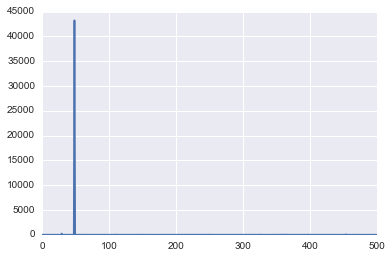

In [37]:
x = range(N_ARMS)
y = played
plt.plot(x,y)
#print played
big = max(played) 
print played.index(big), "->", big